<a href="https://colab.research.google.com/github/yejianfeng2014/keras/blob/master/keras_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

1.12.0


# Keras入门课2：使用CNN识别mnist手写数字

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() # out: np.ndarray
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


↓可视化一些图片

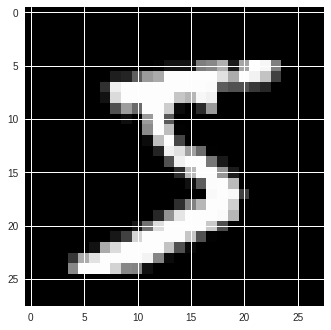

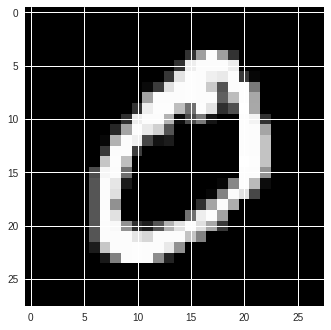

In [5]:
import matplotlib.pyplot as plt
im = plt.imshow(x_train[0],cmap='gray')
plt.show()
im2 = plt.imshow(x_train[1],cmap='gray')
plt.show()

In [6]:
print(K.image_data_format())

channels_last


这里用卷积神经网络来对图像做特征处理，一般来说，输入到网络的图像格式有以下两种：
1. channels_first (batch_size,channels,width,height)
1. channels_last  (batch_size,width,height,channels)

这里channels指的是通道数，灰度图是单通道channels=1，彩色图是三通道channels=3，需要注意的是，即使图像是单通道的，输入数据的维度依然是4维。反观我们的mnist图像数据，只有三维，所以我们要手动把channels这个维度加上。由于Keras使用不同后端的时候，数据格式不一样，所以要分情况进行维度增加

值得注意的是，reshape函数第一个参数为-1，意思为保持当前维度不变

In [0]:
if K.image_data_format()=='channels_first':
    x_train = x_train.reshape(-1,1,28,28)
    x_test = x_test.reshape(-1,1,28,28)
    input_shape = (1,28,28)
else:
    x_train = x_train.reshape(-1,28,28,1)
    x_test = x_test.reshape(-1,28,28,1)
    input_shape = (28,28,1)

In [8]:
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


↓数据归一化

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

↓构建网络模型

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3),
                 activation='relu',input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))#25%的参数会被舍弃
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,batch_size=64,epochs=2
          ,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 190s 3ms/step - loss: 0.2103 - acc: 0.9356 - val_loss: 0.0551 - val_acc: 0.9822
Epoch 2/2
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0781 - acc: 0.9767 - val_loss: 0.0405 - val_acc: 0.9859


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04051917264473159
Test accuracy: 0.9859


## 总结

1. 学习了如何根据不同的模型数据要求，给原始数据图像增加维度
2. 学习了Conv2D卷积层和MaxPooling2D池化层的使用
参考：
> https://github.com/keras-team/keras/tree/master/examples